In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as plt

In [19]:
data = pd.read_csv('tran_red.csv')
data
app=pd.read_csv("maindata.csv")
app=app.head(10000)
dumm=pd.get_dummies(app["round_winner"])
dumm



,CT,T
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,1,0


In [21]:
liss=[data,dumm]
data=pd.concat(liss,axis=1)
data

,Unnamed: 0,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,CT,T
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
9996,9996,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,0
9997,9997,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
9998,9998,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,5.0,0.0,0.0,2.0,0.0,0.0,1,0


In [23]:
data.drop("Unnamed: 0",axis=1,inplace=True)

# New Section

In [27]:

ctdata=pd.DataFrame()
tdata=pd.DataFrame()

i=0
for cols in data:
    colsp=cols.split("_")
    if(len(colsp)>2):
        if(colsp[1]=="weapon" or colsp[1]=="grenade"):
            if(colsp[0]=="t"):
                tdata[cols]=data[cols]
            elif(colsp[0]=="ct"):
                ctdata[cols]=data[cols]
            else:
                tdata=[cols]=data[cols]
                ctdata[cols]=data[cols]

ctdata["CT_win"]=data["CT"]
tdata["CT_win"]=data["T"]
ctdata
tdata

,t_weapon_ak47,t_weapon_aug,t_weapon_awp,t_weapon_bizon,t_weapon_cz75auto,t_weapon_elite,t_weapon_famas,t_weapon_g3sg1,t_weapon_galilar,t_weapon_glock,...,t_weapon_p250,t_weapon_p2000,t_weapon_tec9,t_grenade_hegrenade,t_grenade_flashbang,t_grenade_smokegrenade,t_grenade_incendiarygrenade,t_grenade_molotovgrenade,t_grenade_decoygrenade,CT_win
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9998,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.0,0.0,0


# New Section

""


In [4]:
data

,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,5.0,0.0,0.0,2.0,0.0,0.0


array([[<AxesSubplot:title={'center':'ct_weapon_ak47'}>,
        <AxesSubplot:title={'center':'t_weapon_ak47'}>,
        <AxesSubplot:title={'center':'ct_weapon_aug'}>,
        <AxesSubplot:title={'center':'t_weapon_aug'}>,
        <AxesSubplot:title={'center':'ct_weapon_awp'}>,
        <AxesSubplot:title={'center':'t_weapon_awp'}>,
        <AxesSubplot:title={'center':'ct_weapon_bizon'}>,
        <AxesSubplot:title={'center':'t_weapon_bizon'}>,
        <AxesSubplot:title={'center':'ct_weapon_cz75auto'}>],
       [<AxesSubplot:title={'center':'t_weapon_cz75auto'}>,
        <AxesSubplot:title={'center':'ct_weapon_elite'}>,
        <AxesSubplot:title={'center':'t_weapon_elite'}>,
        <AxesSubplot:title={'center':'ct_weapon_famas'}>,
        <AxesSubplot:title={'center':'t_weapon_famas'}>,
        <AxesSubplot:title={'center':'ct_weapon_g3sg1'}>,
        <AxesSubplot:title={'center':'t_weapon_g3sg1'}>,
        <AxesSubplot:title={'center':'ct_weapon_galilar'}>,
        <AxesSubplot:ti

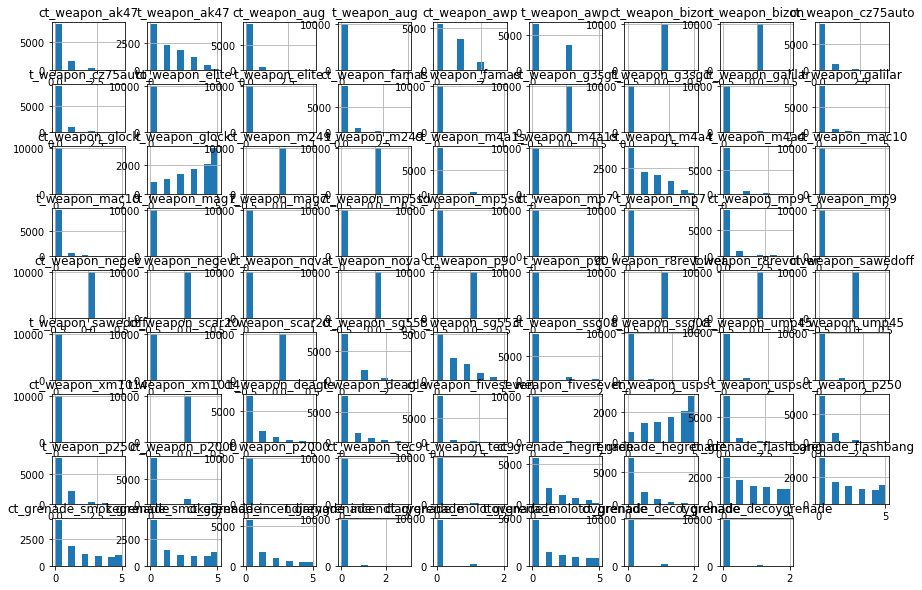

In [5]:
data.hist(figsize=(15, 10))

In [5]:
# data=data.head(500)

In [6]:
# data2=pd.DataFrame()
# for col in data:
#   colsp=col.split("_")
#   string=colsp[0]+colsp[2]
#   data2[string]=data[col]

In [40]:

# data3=pd.DataFrame()
# for col in data:
#   colsp=col.split("_")
#   if(len(colsp)>1):
#         string=colsp[0]+colsp[2]
#         data3[string]=data[col]
# data2=data3

In [41]:
# data2.astype(bool)
# data2

,ctak47,tak47,ctaug,taug,ctawp,tawp,ctbizon,tbizon,ctcz75auto,tcz75auto,...,ctflashbang,tflashbang,ctsmokegrenade,tsmokegrenade,ctincendiarygrenade,tincendiarygrenade,ctmolotovgrenade,tmolotovgrenade,ctdecoygrenade,tdecoygrenade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,5.0,0.0,0.0,2.0,0.0,0.0


,ctak47,tak47,ctaug,taug,ctawp,tawp,ctbizon,tbizon,ctcz75auto,tcz75auto,...,ctflashbang,tflashbang,ctsmokegrenade,tsmokegrenade,ctincendiarygrenade,tincendiarygrenade,ctmolotovgrenade,tmolotovgrenade,ctdecoygrenade,tdecoygrenade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0


In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# transaction=[]
# for i in range(0,7501):
#     transaction.append([str(data.values[i,j]) for j in range(0,20)])

In [ ]:
# transaction

[['0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '5.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '4.0',
  '0.0',
  '0.0',
  '0.0',
  '1.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0'],
 ['0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '5.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',


In [28]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [31]:
ctdata

,ct_weapon_ak47,ct_weapon_aug,ct_weapon_awp,ct_weapon_bizon,ct_weapon_cz75auto,ct_weapon_elite,ct_weapon_famas,ct_weapon_g3sg1,ct_weapon_galilar,ct_weapon_glock,...,ct_weapon_p250,ct_weapon_p2000,ct_weapon_tec9,ct_grenade_hegrenade,ct_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,ct_grenade_molotovgrenade,ct_grenade_decoygrenade,CT_win
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9996,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.0,4.0,2.0,0.0,0.0,1
9997,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,4.0,1.0,0.0,0.0,1
9998,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,4.0,4.0,5.0,0.0,0.0,1


In [32]:
tdata

,t_weapon_ak47,t_weapon_aug,t_weapon_awp,t_weapon_bizon,t_weapon_cz75auto,t_weapon_elite,t_weapon_famas,t_weapon_g3sg1,t_weapon_galilar,t_weapon_glock,...,t_weapon_p250,t_weapon_p2000,t_weapon_tec9,t_grenade_hegrenade,t_grenade_flashbang,t_grenade_smokegrenade,t_grenade_incendiarygrenade,t_grenade_molotovgrenade,t_grenade_decoygrenade,CT_win
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9998,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.0,0.0,0


In [30]:
frequent_itemsets = apriori(ctdata.astype(bool), min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.5587,(ct_weapon_m4a4)
1,0.9359,(ct_weapon_usps)
2,0.6593,(ct_grenade_flashbang)
3,0.5725,(ct_grenade_smokegrenade)
4,0.5486,"(ct_weapon_usps, ct_weapon_m4a4)"
5,0.5071,"(ct_weapon_m4a4, ct_grenade_flashbang)"
6,0.6384,"(ct_weapon_usps, ct_grenade_flashbang)"
7,0.5562,"(ct_weapon_usps, ct_grenade_smokegrenade)"
8,0.5217,"(ct_grenade_smokegrenade, ct_grenade_flashbang)"
9,0.5115,"(ct_weapon_usps, ct_grenade_smokegrenade, ct_g..."


In [33]:

rules = association_rules(frequent_itemsets, metric="lift")
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ct_weapon_usps),(ct_weapon_m4a4),0.9359,0.5587,0.5486,0.586174,1.049174,0.025713,1.066390
1,(ct_weapon_m4a4),(ct_weapon_usps),0.5587,0.9359,0.5486,0.981922,1.049174,0.025713,3.545809
2,(ct_weapon_m4a4),(ct_grenade_flashbang),0.5587,0.6593,0.5071,0.907643,1.376676,0.138749,3.688936
3,(ct_grenade_flashbang),(ct_weapon_m4a4),0.6593,0.5587,0.5071,0.769149,1.376676,0.138749,1.911623
4,(ct_weapon_usps),(ct_grenade_flashbang),0.9359,0.6593,0.6384,0.682124,1.034619,0.021361,1.071802


In [34]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ct_weapon_m4a4),(ct_weapon_usps),0.5587,0.9359,0.5486,0.981922,1.049174,0.025713,3.545809
2,(ct_weapon_m4a4),(ct_grenade_flashbang),0.5587,0.6593,0.5071,0.907643,1.376676,0.138749,3.688936
5,(ct_grenade_flashbang),(ct_weapon_usps),0.6593,0.9359,0.6384,0.968300,1.034619,0.021361,2.022064
7,(ct_grenade_smokegrenade),(ct_weapon_usps),0.5725,0.9359,0.5562,0.971528,1.038069,0.020397,2.251365
8,(ct_grenade_smokegrenade),(ct_grenade_flashbang),0.5725,0.6593,0.5217,0.911266,1.382173,0.144251,3.839582
10,"(ct_grenade_smokegrenade, ct_weapon_usps)",(ct_grenade_flashbang),0.5562,0.6593,0.5115,0.919633,1.394863,0.144797,4.239314
11,"(ct_weapon_usps, ct_grenade_flashbang)",(ct_grenade_smokegrenade),0.6384,0.5725,0.5115,0.801222,1.399514,0.146016,2.150638
12,"(ct_grenade_smokegrenade, ct_grenade_flashbang)",(ct_weapon_usps),0.5217,0.9359,0.5115,0.980449,1.047600,0.023241,3.278526
14,(ct_grenade_smokegrenade),"(ct_weapon_usps, ct_grenade_flashbang)",0.5725,0.6384,0.5115,0.893450,1.399514,0.146016,3.393705


In [35]:
frequent_itemsets.itemsets

0                                     (ct_weapon_m4a4)
1                                     (ct_weapon_usps)
2                               (ct_grenade_flashbang)
3                            (ct_grenade_smokegrenade)
4                     (ct_weapon_usps, ct_weapon_m4a4)
5               (ct_weapon_m4a4, ct_grenade_flashbang)
6               (ct_weapon_usps, ct_grenade_flashbang)
7            (ct_weapon_usps, ct_grenade_smokegrenade)
8      (ct_grenade_smokegrenade, ct_grenade_flashbang)
9    (ct_weapon_usps, ct_grenade_smokegrenade, ct_g...
Name: itemsets, dtype: object

In [36]:
frequent_itemsets = apriori(tdata.astype(bool), min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.5788,(t_weapon_ak47)
1,0.9220,(t_weapon_glock)
2,0.5095,(t_weapon_sg553)
3,0.6581,(t_grenade_flashbang)
4,0.5696,(t_grenade_smokegrenade)
5,0.5204,(t_grenade_molotovgrenade)
6,0.5455,(CT_win)
7,0.5663,"(t_weapon_ak47, t_weapon_glock)"
8,0.5045,"(t_weapon_ak47, t_grenade_flashbang)"
9,0.6334,"(t_weapon_glock, t_grenade_flashbang)"


In [37]:

rules = association_rules(frequent_itemsets, metric="lift")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(t_weapon_ak47),(t_weapon_glock),0.5788,0.9220,0.5663,0.978404,1.061175,0.032646,3.611712
1,(t_weapon_glock),(t_weapon_ak47),0.9220,0.5788,0.5663,0.614208,1.061175,0.032646,1.091781
2,(t_weapon_ak47),(t_grenade_flashbang),0.5788,0.6581,0.5045,0.871631,1.324466,0.123592,2.663415
3,(t_grenade_flashbang),(t_weapon_ak47),0.6581,0.5788,0.5045,0.766601,1.324466,0.123592,1.804634
4,(t_weapon_glock),(t_grenade_flashbang),0.9220,0.6581,0.6334,0.686985,1.043891,0.026632,1.092279


In [38]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(t_weapon_ak47),(t_weapon_glock),0.5788,0.9220,0.5663,0.978404,1.061175,0.032646,3.611712
2,(t_weapon_ak47),(t_grenade_flashbang),0.5788,0.6581,0.5045,0.871631,1.324466,0.123592,2.663415
5,(t_grenade_flashbang),(t_weapon_glock),0.6581,0.9220,0.6334,0.962468,1.043891,0.026632,2.078211
6,(t_grenade_smokegrenade),(t_weapon_glock),0.5696,0.9220,0.5521,0.969277,1.051276,0.026929,2.538789
8,(t_grenade_molotovgrenade),(t_weapon_glock),0.5204,0.9220,0.5086,0.977325,1.060006,0.028791,3.439932
10,(CT_win),(t_weapon_glock),0.5455,0.9220,0.5225,0.957837,1.038869,0.019549,1.849957
12,(t_grenade_smokegrenade),(t_grenade_flashbang),0.5696,0.6581,0.5189,0.910990,1.384273,0.144046,3.841149
14,"(t_grenade_smokegrenade, t_weapon_glock)",(t_grenade_flashbang),0.5521,0.6581,0.5076,0.919399,1.397050,0.144263,4.241865
15,"(t_grenade_smokegrenade, t_grenade_flashbang)",(t_weapon_glock),0.5189,0.9220,0.5076,0.978223,1.060980,0.029174,3.581788
16,"(t_weapon_glock, t_grenade_flashbang)",(t_grenade_smokegrenade),0.6334,0.5696,0.5076,0.801389,1.406934,0.146815,2.167054


In [39]:
frequent_itemsets.itemsets

0                                       (t_weapon_ak47)
1                                      (t_weapon_glock)
2                                      (t_weapon_sg553)
3                                 (t_grenade_flashbang)
4                              (t_grenade_smokegrenade)
5                            (t_grenade_molotovgrenade)
6                                              (CT_win)
7                       (t_weapon_ak47, t_weapon_glock)
8                  (t_weapon_ak47, t_grenade_flashbang)
9                 (t_weapon_glock, t_grenade_flashbang)
10             (t_grenade_smokegrenade, t_weapon_glock)
11           (t_grenade_molotovgrenade, t_weapon_glock)
12                             (CT_win, t_weapon_glock)
13        (t_grenade_smokegrenade, t_grenade_flashbang)
14    (t_grenade_smokegrenade, t_weapon_glock, t_gre...
Name: itemsets, dtype: object

In [57]:
# for item in rules:

#     # first index of the inner list
#     # Contains base item and add item
#     pair = item[0] 
#     items = [x for x in pair]
#     print("Rule: " + items[0] )

#     #second index of the inner list
#     print("Support: " + str(item[1]))

#     #third index of the list located at 0th
#     #of the third index of the inner list

#     print("Confidence: " + str(item[2][0][2]))
#     print("Lift: " + str(item[2][0][3]))
#     print("=====================================")

Rule: a
Support: n


IndexError: string index out of range